In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

### Data Visualization

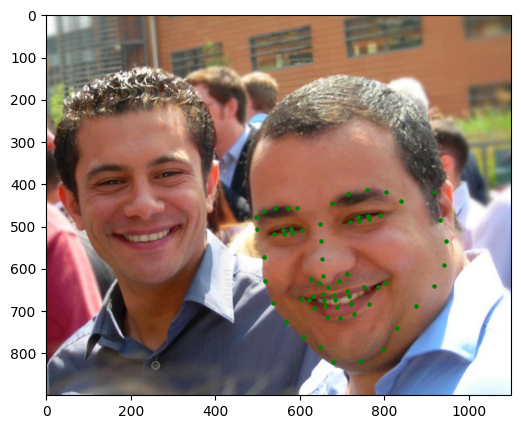

In [7]:
PATH_TO_DATA = Path.cwd() / "data"

path_to_points = PATH_TO_DATA / "ibug_300W_large_face_landmark_dataset/helen/testset/30427236_1.pts"
path_to_image = PATH_TO_DATA / "ibug_300W_large_face_landmark_dataset/helen/testset/30427236_1.jpg"
points_file = open(path_to_points)

points = points_file.readlines()[3:-1]

landmarks = []

for point in points:
    x, y = point.split(' ')
    landmarks.append((float(x), float(y[:-1])))

landmarks = np.array(landmarks)

plt.figure(figsize=(6, 6))
plt.imshow(mpimg.imread(path_to_image))
plt.scatter(landmarks[:,0], landmarks[:,1], s = 5, c = 'g')
plt.show()

### Dataset

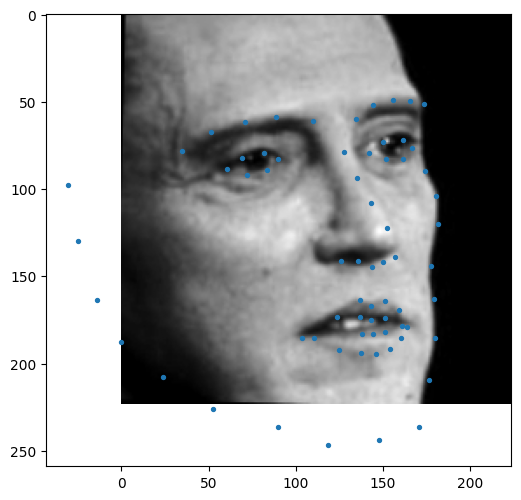

In [8]:
from src.dataset import FaceLandmarksDataset
from src.transforms import Transforms

dataset = FaceLandmarksDataset(root_dir='data/', transform=Transforms())

image, landmarks = dataset[0]
landmarks = (landmarks + 0.5) * 224
plt.figure(figsize=(6, 6))
plt.imshow(image.numpy().squeeze(), cmap='gray')
plt.scatter(landmarks[:,0], landmarks[:,1], s=8)